In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import normalize

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [87]:
df_train_X = pd.read_csv('../Data/train_data.csv')
df_train_Y = pd.read_csv('../Data/train_answers.csv')

In [88]:
df_test = pd.read_csv('../Data/test_data.csv')

In [89]:
df_train_X.shape

(5337, 6)

In [90]:
df_train = df_train_X.merge(df_train_Y, on='itemId', how='inner')

In [91]:
def area(box):
    return (box[2] - box[0]) * (box[3] - box[1])


def intersection_over_union(boxes):
    assert(len(boxes) == 8)
    boxA = boxes[:4].values
    boxB = boxes[4:].values
    
    boxAArea = area(boxA)
    boxBArea = area(boxB)
    
    if (boxAArea == 0 or boxBArea == 0):
        return 0
        
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])

    interArea = max(0, xB - xA) * max(0, yB - yA)

    
    iou = interArea / float(boxAArea + boxBArea - interArea)
    return iou

# EDA

In [92]:
df_train.head()

,userId,itemId,Xmin,Ymin,Xmax,Ymax,Xmin_true,Ymin_true,Xmax_true,Ymax_true
0,1164,6132,62,656,276,803,47,650,213,812
1,1399,6132,184,662,235,740,47,650,213,812
2,1694,6132,63,648,272,830,47,650,213,812
3,916,6132,111,637,253,831,47,650,213,812
4,1621,6132,60,651,242,819,47,650,213,812


In [93]:
df_train['Ymin_err'] = abs(df_train['Ymin_true'] - df_train['Ymin'])
df_train['Xmin_err'] = abs(df_train['Xmin_true'] - df_train['Xmin'])
df_train['Ymax_err'] = abs(df_train['Ymax_true'] - df_train['Ymax'])
df_train['Xmax_err'] = abs(df_train['Xmax_true'] - df_train['Xmax'])

df_train['Total_err'] = df_train['Ymin_err'] + df_train['Xmin_err'] + \
                                    df_train['Ymax_err'] + df_train['Xmax_err']

In [94]:
df_train.head()

,userId,itemId,Xmin,Ymin,Xmax,Ymax,Xmin_true,Ymin_true,Xmax_true,Ymax_true,Ymin_err,Xmin_err,Ymax_err,Xmax_err,Total_err
0,1164,6132,62,656,276,803,47,650,213,812,6,15,9,63,93
1,1399,6132,184,662,235,740,47,650,213,812,12,137,72,22,243
2,1694,6132,63,648,272,830,47,650,213,812,2,16,18,59,95
3,916,6132,111,637,253,831,47,650,213,812,13,64,19,40,136
4,1621,6132,60,651,242,819,47,650,213,812,1,13,7,29,50


In [95]:
df_coeffs = pd.DataFrame(df_train.groupby('userId')['Total_err'].mean())
df_coeffs['user_Coeff'] = 2000 - df_coeffs['Total_err']
df_coeffs['user_Coeff'] = np.log1p(df_coeffs['user_Coeff'])
# df_coeffs['user_Coeff'] = df_coeffs['user_Coeff'].replace(np.inf, 25)

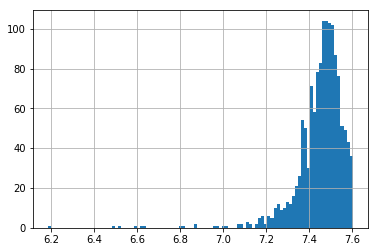

In [96]:
df_coeffs['user_Coeff'].hist(bins=100)

In [97]:
mean_coeff = df_coeffs['user_Coeff'].mean()
mean_coeff

7.448553871575746

In [98]:
df_train = df_train.merge(df_coeffs[['user_Coeff']], how='left', left_on='userId', right_index=True)

In [99]:
df_train

,userId,itemId,Xmin,Ymin,Xmax,Ymax,Xmin_true,Ymin_true,Xmax_true,Ymax_true,Ymin_err,Xmin_err,Ymax_err,Xmax_err,Total_err,user_Coeff
0,1164,6132,62,656,276,803,47,650,213,812,6,15,9,63,93,7.380671
1,1399,6132,184,662,235,740,47,650,213,812,12,137,72,22,243,7.473637
2,1694,6132,63,648,272,830,47,650,213,812,2,16,18,59,95,7.519240
3,916,6132,111,637,253,831,47,650,213,812,13,64,19,40,136,7.452568
4,1621,6132,60,651,242,819,47,650,213,812,1,13,7,29,50,7.369223
5,1092,6132,39,649,249,825,47,650,213,812,1,8,13,36,58,7.412663
6,301,31297,29,393,126,487,18,390,122,472,3,11,15,4,33,7.584773
7,1508,31297,25,399,120,485,18,390,122,472,9,7,13,2,31,7.420397
8,535,31297,25,399,108,472,18,390,122,472,9,7,0,14,30,7.473495
9,254,18168,209,739,534,1051,35,713,656,1082,26,174,31,122,353,7.517928


In [100]:
rez = []

for itemid in df_train['itemId'].unique():
    df_item = df_train[df_train['itemId'] == itemid]
    norm = normalize(df_item['user_Coeff'].values.reshape(1, -1), norm='l1')
#     print(norm)
    
#     print(df_item['Ymin'].values)
    Ymin_pred = np.multiply(df_item['Ymin'].values, norm).sum()
    Xmin_pred = np.multiply(df_item['Xmin'].values, norm).sum()
    Ymax_pred = np.multiply(df_item['Ymax'].values, norm).sum()
    Xmax_pred = np.multiply(df_item['Xmax'].values, norm).sum()
    
    rez.append({'itemId':    itemid,
                'Ymin_pred': Ymin_pred, 
                'Xmin_pred': Xmin_pred,
                'Ymax_pred': Ymax_pred,
                'Xmax_pred': Xmax_pred})

In [101]:
df_pred = pd.DataFrame(rez)
df_pred.head()


,Xmax_pred,Xmin_pred,Ymax_pred,Ymin_pred,itemId
0,254.510568,86.642419,807.973063,650.493238,6132
1,118.034879,26.349684,481.352724,396.975474,31297
2,533.412756,203.603629,1034.067790,725.329644,18168
3,61.000000,53.331474,1027.669119,1019.662355,8398
4,615.968562,237.250189,1197.779869,990.054104,8774


In [102]:
df_pred = df_pred.merge(df_train_Y, on='itemId', how='inner')

In [103]:
df_pred["iou"] = df_pred[['Xmin_pred','Ymin_pred', 'Xmax_pred', 'Ymax_pred', 'Xmin_true',\
      'Ymin_true', 'Xmax_true','Ymax_true']].apply(intersection_over_union, axis=1)

In [104]:
df_pred['iou'].mean()

0.5063333425827309

### Test dataset

In [73]:
df_test = df_test.merge(df_coeffs[['user_Coeff']], left_on='userId', right_index=True, how='left')
df_test.fillna(mean_coeff, inplace=True)

In [74]:
rez_test = []

for itemid in df_test['itemId'].unique():
    df_item = df_test[df_test['itemId'] == itemid]
    norm = normalize(df_item['user_Coeff'].values.reshape(1, -1), norm='l1')
#     print(norm)
    
#     print(df_item['Ymin'].values)
    Ymin_pred = np.multiply(df_item['Ymin'].values, norm).sum()
    Xmin_pred = np.multiply(df_item['Xmin'].values, norm).sum()
    Ymax_pred = np.multiply(df_item['Ymax'].values, norm).sum()
    Xmax_pred = np.multiply(df_item['Xmax'].values, norm).sum()
    
    rez_test.append({'itemId':    itemid,
                'Ymin_pred': Ymin_pred, 
                'Xmin_pred': Xmin_pred,
                'Ymax_pred': Ymax_pred,
                'Xmax_pred': Xmax_pred})

In [75]:
df_rez = pd.DataFrame(rez_test)

In [76]:
df_rez.columns

Index(['Xmax_pred', 'Xmin_pred', 'Ymax_pred', 'Ymin_pred', 'itemId'], dtype='object')

In [77]:
df_rez = df_rez[['itemId', 'Xmin_pred', 'Ymin_pred', 'Xmax_pred', 'Ymax_pred']].sort_values('itemId')

In [78]:
df_rez.to_csv('../Submits/submit2.csv', header=False, index=False)

In [106]:
df_rez

,itemId,Xmin_pred,Ymin_pred,Xmax_pred,Ymax_pred
227,18,135.077519,703.397072,729.301464,1071.525408
99,19,29.645583,560.652666,114.645583,725.669965
369,33,45.973268,393.392716,374.919910,633.781386
511,62,90.423176,964.033583,567.578598,1168.027804
561,114,63.056189,575.155870,207.950431,766.739672
494,146,71.420932,481.507442,577.916977,816.640951
186,156,82.952471,806.001871,154.956452,879.065936
378,163,30.332219,321.893734,201.388206,453.642989
474,164,9.583792,148.729215,365.927639,659.385668
327,179,125.843339,512.584842,322.458826,728.873688
